In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import seaborn as sns


In [2]:
df = pd.read_csv('/content/true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [3]:
df.shape

(852122, 8)

In [4]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [5]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [6]:
numericals =[]
for feature in df.columns:
  if df[feature].dtypes == 'int64':
    numericals.append(feature)

In [7]:
len(numericals)

3

In [8]:
float=[]
for feature in df.columns:
  if df[feature].dtypes == 'float64':
    float.append(feature)

In [9]:
len(float)

0

In [10]:
categeoricals =[]
for feature in df.columns:
  if df[feature].dtypes == 'object':
    categeoricals.append(feature)

In [11]:
len(categeoricals)

5

In [12]:
#now lets seperate the continuous features from all the numerical features

continuous =[]
for feature in numericals:
  if len(df[feature].unique())>= 25:
    continuous.append(feature)

In [13]:
len(continuous)

2

In [14]:
discrete=[]
for feature in df.columns:
  if len(df[feature].unique())<=25:
    discrete.append(feature)

In [15]:
#now we have seperated all the columns with more that 25 unique valuses. we can consider them as a continuous variables.

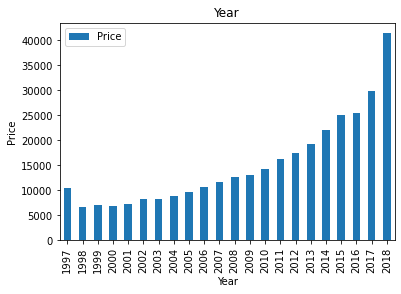

In [16]:
#lets plot a bar plot with the target feature
for feature in discrete:
  pivot = df.pivot_table(index = feature,values='Price', aggfunc = 'mean')
  pivot.plot(kind = 'bar')
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.title(feature)


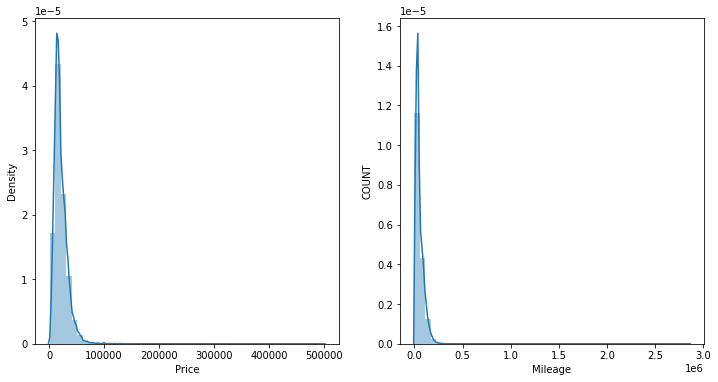

In [17]:
#now lets plot a dist plots of continuous fatures
fig,ax = plt.subplots(ncols =2,nrows = 1,figsize =(12,6))
ax = ax.flatten()
for i,j in enumerate(continuous):
  sns.distplot(df[j],ax= ax[i])
  plt.xlabel(j)
  plt.ylabel('COUNT')

In [18]:
#

from the above dstplots we can assume that the behaviour is some what left skewed. now lets plot a box plot inorder to find the presence of ouliers


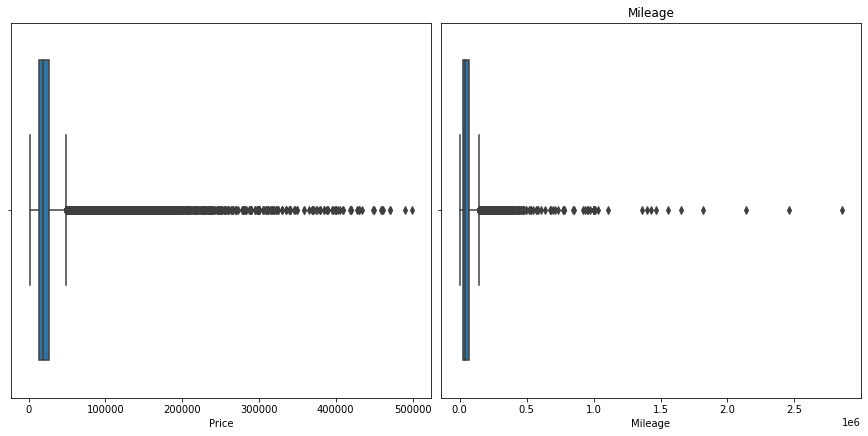

In [19]:
#outliers
fig,ax = plt.subplots(nrows = 1,ncols =2,figsize = (12,6))
ax = ax.flatten()
for i,feature in enumerate(continuous):
  sns.boxplot(df[feature],ax= ax[i])
  plt.title(feature)
  plt.xlabel(feature)
  plt.tight_layout(pad = 0.5,w_pad=0.5,h_pad = 0.6)


from the above box plots we can assume that there are many outliers presence in the dataset. lets find the upper and lower bounds for detecting the range in between the values are not outliers.

In [20]:
#as the distplot shows the behaviour is left skwed we can not use the standard normal outlier detection. so lets go for inter quantile range


In [21]:
def percentile(x):
  min = np.percentile(x,25)
  max = np.percentile(x,75)
  diff = max-min
  upper_bound = max+(1.5*diff)
  lower_bound = min-(1.5*diff)
  print(upper_bound,lower_bound)


In [22]:
percentile(df['Price'])

47987.5 -7992.5


In [23]:
percentile(df['Mileage'])

144711.0 -48689.0


In [24]:
percentile(df['Mileage'])

144711.0 -48689.0


In [25]:
df['Price'].describe()

count    852122.000000
mean      21464.100210
std       13596.202241
min        1500.000000
25%       13000.000000
50%       18500.000000
75%       26995.000000
max      499500.000000
Name: Price, dtype: float64

In [26]:
df['Mileage'].describe()

count    8.521220e+05
mean     5.250779e+04
std      4.198896e+04
min      5.000000e+00
25%      2.383600e+04
50%      4.025600e+04
75%      7.218600e+04
max      2.856196e+06
Name: Mileage, dtype: float64

In [27]:
def percentile1(x):
  min = np.percentile(x,25)
  max = np.percentile(x,75)
  diff = max-min
  upper_bound = max+(3.0*diff)
  lower_bound = min-(3.0*diff)
  print(upper_bound,lower_bound)

In [28]:
percentile1(df['Price'])

68980.0 -28985.0


In [29]:
percentile1(df['Mileage'])

217236.0 -121214.0


In [30]:
df1 = df.copy()

In [31]:
# now lets find the indexes of the values that are out of the bounding range
#then we can equal those values to the uppr bound valuue. as we compared withe describe method, there is no chance of consider the lower bound values.


df.loc[df['Mileage']>144711.0,'Mileage'] = 144711.0


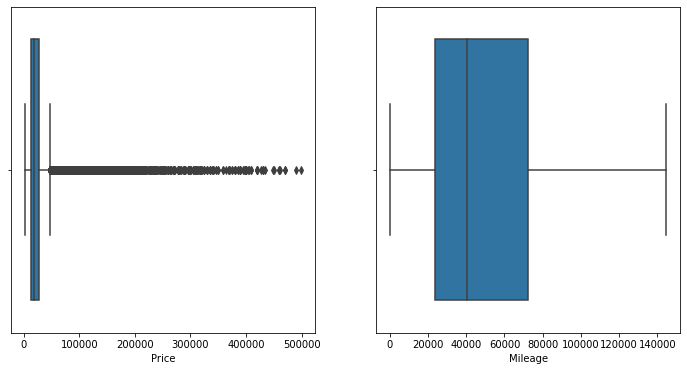

In [32]:
fig,ax = plt.subplots(ncols = 2,nrows = 1,figsize = (12,6))
ax = ax.flatten()

for i,feature in enumerate(continuous):
  sns.boxplot(df[feature],ax = ax[i])
  

In [33]:
def outlier(x):
  indices = list(x.index[x>47987.5])
  values = list(x[indices])
  print(len(values))
  print(indices)

In [34]:
outlier(df1['Price'])

28025
[10596, 10599, 10614, 10650, 10653, 10665, 10667, 10669, 10670, 10676, 10680, 10686, 10689, 10690, 10691, 10695, 10698, 10700, 10701, 10710, 10712, 10725, 10731, 10732, 10734, 10736, 10741, 10746, 10750, 10757, 10763, 10764, 10765, 10766, 10767, 10775, 10777, 10778, 10785, 10789, 10794, 10795, 10796, 10797, 10798, 10799, 10800, 10801, 10807, 10814, 10815, 10819, 10823, 10828, 10835, 10839, 10842, 10850, 10861, 10869, 10872, 10880, 10884, 10900, 10903, 10905, 10928, 10948, 10965, 10982, 10998, 10999, 11005, 11006, 11007, 11009, 11010, 11011, 11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022, 11023, 11024, 11026, 11027, 11028, 11029, 11030, 11031, 11032, 11033, 11034, 11035, 11036, 11037, 11038, 11039, 11040, 11041, 11042, 11043, 11044, 11045, 11046, 11047, 11048, 11069, 11071, 11072, 11073, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11082, 11083, 11084, 11085, 11086, 11087, 11088, 11089, 11090, 11091, 11092, 11096, 11097, 11098, 11099, 11100,

In [35]:
df.shape

(852122, 8)

In [36]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [37]:
#lets draw a pie chart for the visualization
#in this data set we can visualize the data in pie chart using the model and the city and by state.

print(len(df['City'].unique()))
print(len(df['State'].unique()))
print(len(df['Model'].unique()))

2553
59
2736


<Figure size 864x432 with 0 Axes>

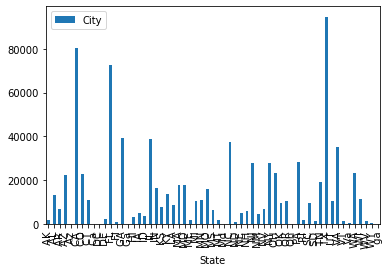

In [38]:
#lets make a pivot table using the city
pivot = pd.pivot_table(data = df,values = 'Model',index = 'City',aggfunc= 'count')
pivot1 =pd.pivot_table(data = df,values ='City',index= 'State',aggfunc = 'count')
plt.figure(figsize = (12,6))
pivot1.plot(kind= 'bar')


In [39]:
indices = pivot1.index

([<matplotlib.patches.Wedge at 0x7f06ebfc7e10>,
 [Text(1.0994045524219298, 0.03618881199951471, ' AK'),
  Text(1.041062583353626, 0.3552304850953458, ' AL'),
  Text(0.8201263510621504, 0.7330707798660936, ' AR'),
  Text(0.28342357037196475, 1.0628598589454812, ' AZ'),
  Text(-0.20113583630037177, 1.0814547495645623, ' Az'),
  Text(-1.0767656282853242, -0.2248905994996477, ' CA'),
  Text(0.6932372249866188, -0.8540621463879852, ' CO'),
  Text(1.0739634708231602, -0.23791272210092332, ' CT'),
  Text(1.0999985871779734, -0.0017630106245639056, ' Ca'),
  Text(1.099999865401313, -0.0005441664205216003, ' DC')],
 [Text(0.5996752104119617, 0.019739351999735293, '1.05%'),
  Text(0.5678523181928868, 0.1937620827792795, '8.37%'),
  Text(0.44734164603390014, 0.3998567890178692, '4.38%'),
  Text(0.15459467474834437, 0.5797417412429897, '14.11%'),
  Text(-0.10971045616383913, 0.5898844088533975, '0.04%'),
  Text(-0.5873267063374495, -0.12266759972708055, '50.66%'),
  Text(0.3781293954472466, -0.465

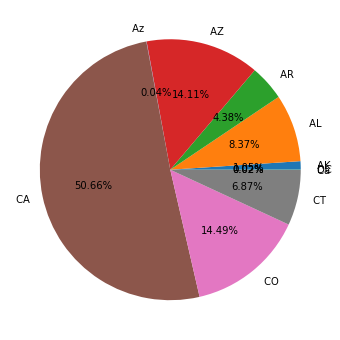

In [40]:
plt.figure(figsize= (12,6))
plt.pie(pivot1['City'][:10],labels = indices[:10],autopct = '%1.2f%%')

<Figure size 864x432 with 0 Axes>

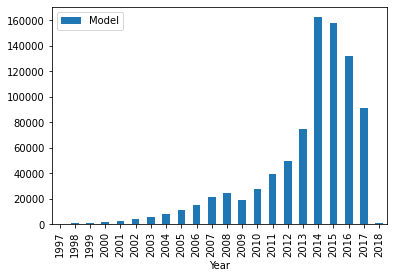

In [41]:
pivot2 = pd.pivot_table(data = df,values ='Model',index ='Year',aggfunc = 'count')
plt.figure(figsize=(12,6))
pivot2.plot(kind = 'bar')

In [42]:
pivot2
label = pivot2.index

([<matplotlib.patches.Wedge at 0x7f06ebeac610>,
 [Text(1.0992526358431223, 0.04054186221608497, '1997'),
  Text(1.0918769204624335, 0.13343459282162543, '1998'),
  Text(1.0666039450272011, 0.26899075161129904, '1999'),
  Text(0.9932649708078274, 0.47267821799415083, '2000'),
  Text(0.82439870659364, 0.7282628457958938, '2001'),
  Text(0.4808026266288621, 0.9893577887836065, '2002'),
  Text(-0.14487444341152805, 1.0904179912520704, '2003'),
  Text(-0.9157231006848316, 0.6094679670599251, '2004'),
  Text(-0.9106402034519943, -0.6170368059175324, '2005'),
  Text(0.6552462070135254, -0.8835453628390499, '2006')],
 [Text(0.5995923468235212, 0.022113743026955433, '1.17%'),
  Text(0.5955692293431455, 0.07278250517543204, '1.52%'),
  Text(0.5817839700148368, 0.14672222815161765, '2.47%'),
  Text(0.5417808931679058, 0.25782448254226403, '3.81%'),
  Text(0.44967202177834903, 0.39723427952503293, '5.09%'),
  Text(0.26225597816119744, 0.5396497029728762, '7.48%'),
  Text(-0.07902242367901528, 0.59

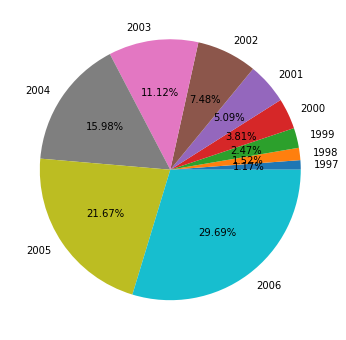

In [43]:
plt.figure(figsize=(12,6))
plt.pie(x = pivot2['Model'][:10],labels = label[:10],autopct= '%1.2f%%')

<Figure size 864x432 with 0 Axes>

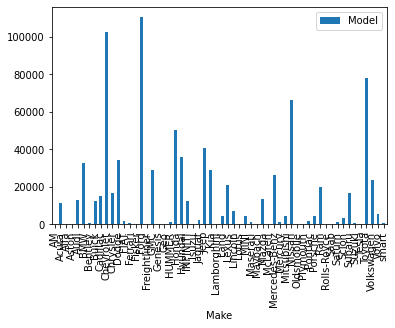

In [44]:
pivot4 = pd.pivot_table(data = df, index= 'Make',values = 'Model',aggfunc = 'count')
pivot4.sort_values(by = 'Model')
plt.figure(figsize=(12,6))
pivot4.plot(kind = 'bar')

In [45]:
label1 = pivot4.index

([<matplotlib.patches.Wedge at 0x7f06ed8607d0>,
 [Text(1.0999999436406875, 0.0003521228258870073, 'AM'),
  Text(1.0808652224247317, 0.20428012862913414, 'Acura'),
  Text(1.0240860109822378, 0.40155677320957717, 'Alfa'),
  Text(1.022774873000068, 0.40488462450393764, 'Aston'),
  Text(0.9127855454280489, 0.6138587362395518, 'Audi'),
  Text(0.24009879409951163, 1.0734768600542632, 'BMW'),
  Text(-0.35880609825822857, 1.0398356523281487, 'Bentley'),
  Text(-0.5739229857320484, 0.9384095089290235, 'Buick'),
  Text(-0.9331836260844225, 0.5823815931225238, 'Cadillac'),
  Text(-0.1667885350383202, -1.0872817411231421, 'Chevrolet')],
 [Text(0.5999999692585567, 0.0001920669959383676, '0.01%'),
  Text(0.589562848595308, 0.11142552470680042, '5.93%'),
  Text(0.5585923696266751, 0.2190309672052239, '0.02%'),
  Text(0.5578772034545826, 0.22084615882032962, '0.08%'),
  Text(0.4978830247789357, 0.33483203794884636, '6.77%'),
  Text(0.1309629785997336, 0.5855328327568708, '17.38%'),
  Text(-0.195712417

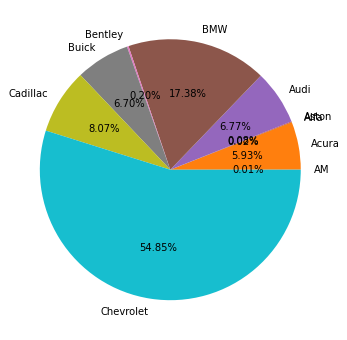

In [46]:
plt.figure(figsize=(12,6))
plt.pie(x = pivot4['Model'][:10], labels = label1[:10], autopct = '%1.2f%%')

In [47]:
# lets visulize some count plots
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


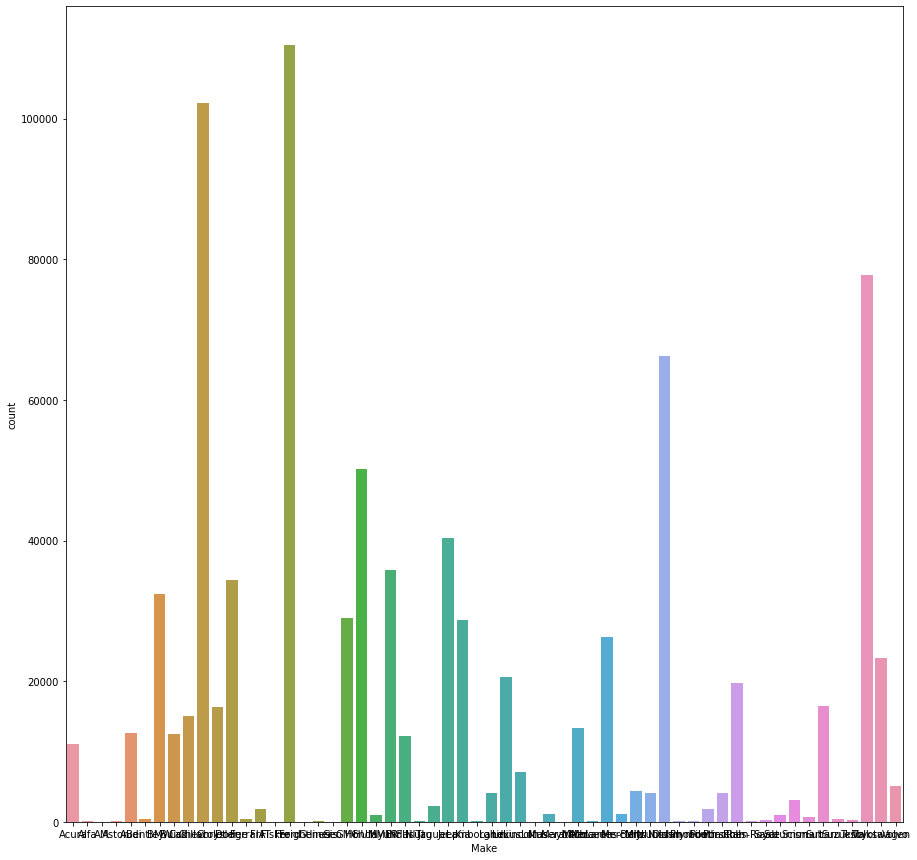

In [48]:
plt.figure(figsize = (15,15))
sns.countplot(df['Make'])

In [49]:
df2 = df.copy()
df2.shape
len(df['Make'].unique())

58

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City']= le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Model'] = le.fit_transform(df['Model'])


In [51]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,646,49,19VDE2E53EE000083,Acura,1194
1,10888,2013,19606,1260,39,19VDE1F52DE012636,Acura,1193
2,8995,2013,48851,646,49,19VDE2E52DE000025,Acura,1194
3,10999,2014,39922,2490,6,19VDE1F71EE003817,Acura,1193
4,14799,2016,22142,1231,50,19UDE2F32GA001284,Acura,1196


In [52]:
df = df.drop(columns = 'Vin',axis = 1)

In [53]:
df.head()


,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,646,49,Acura,1194
1,10888,2013,19606,1260,39,Acura,1193
2,8995,2013,48851,646,49,Acura,1194
3,10999,2014,39922,2490,6,Acura,1193
4,14799,2016,22142,1231,50,Acura,1196


In [54]:
df = pd.concat([df,pd.get_dummies(df['Make'],drop_first=True),],axis = 1)
df = df.drop(columns = 'Make',axis = 1)

In [55]:
df.head()

,Price,Year,Mileage,City,State,Model,Acura,Alfa,Aston,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Fisker,Ford,Freightliner,GMC,Genesis,Geo,HUMMER,Honda,Hyundai,INFINITI,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land,Lexus,Lincoln,Lotus,MINI,Maserati,Maybach,Mazda,McLaren,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Ram,Rolls-Royce,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,8995,2014,35725,646,49,1194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10888,2013,19606,1260,39,1193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8995,2013,48851,646,49,1194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10999,2014,39922,2490,6,1193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14799,2016,22142,1231,50,1196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df5 = df.drop(columns = 'Price',axis = 1)
test = df['Price']
df5.head(10)

,Year,Mileage,City,State,Model,Acura,Alfa,Aston,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ferrari,Fisker,Ford,Freightliner,GMC,Genesis,Geo,HUMMER,Honda,Hyundai,INFINITI,Isuzu,Jaguar,Jeep,Kia,Lamborghini,Land,Lexus,Lincoln,Lotus,MINI,Maserati,Maybach,Mazda,McLaren,Mercedes-Benz,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Ram,Rolls-Royce,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,2014,35725,646,49,1194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013,19606,1260,39,1193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,48851,646,49,1194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,39922,2490,6,1193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016,22142,1231,50,1196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2012,105246,1397,11,2249,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2014,34032,888,39,2252,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2013,32384,2429,50,2248,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2013,57596,2389,7,1194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2013,63887,646,49,1193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x = pd.DataFrame(pca.fit_transform(df5))
x.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-15523.061292,-53.570907,-595.464453,20.695784,0.398459,-0.032030,-0.088075,-0.056687,-0.096126,-0.058627,-0.047838,-0.023172,0.030532,-0.040653,0.012625,0.025571,0.061076,0.076089,0.104987,0.073784
1,-31642.205210,-55.517495,14.754256,11.584289,2.558084,-0.021288,-0.068748,-0.047296,-0.087005,-0.054073,-0.045514,-0.022061,0.016072,-0.046018,0.007248,0.006859,0.055296,0.070768,0.111308,0.072337
2,-2397.066416,-64.837587,-592.540670,20.555357,0.454023,-0.035584,-0.090081,-0.062191,-0.093898,-0.062594,-0.047182,-0.020083,0.032625,-0.042330,0.016114,0.024808,0.062092,0.074387,0.106315,0.072829
3,-11326.512989,-102.570105,1248.960599,-20.201165,0.101335,-0.026244,-0.067480,-0.055022,-0.101084,-0.058889,-0.034606,-0.029993,0.027314,-0.051313,0.001022,0.027012,0.064421,0.079908,0.111946,0.073481
4,-29106.196693,-53.995439,-13.613004,22.522004,-0.627349,-0.031601,-0.088047,-0.052367,-0.103817,-0.054056,-0.047331,-0.029989,0.033423,-0.038298,0.006977,0.034646,0.062294,0.081428,0.100692,0.075278
5,53998.627806,923.366023,196.245195,-17.272371,-2.517607,0.004233,-0.119181,-0.090243,-0.138927,-0.032508,-0.042287,-0.051084,0.057632,-0.013094,0.016537,0.095254,0.085165,0.103614,0.158444,0.049023
6,-17215.217425,999.748203,-328.429978,10.897466,0.599377,0.025136,-0.103375,-0.060380,-0.128954,-0.012150,-0.053264,-0.054025,0.033668,-0.005482,0.007543,0.070309,0.070472,0.098357,0.156052,0.050120
7,-18863.594967,960.067670,1211.646164,23.710829,1.705792,0.022606,-0.093469,-0.061106,-0.121419,-0.011825,-0.052386,-0.051766,0.030270,-0.010077,0.007003,0.060137,0.067474,0.093784,0.156598,0.047595
8,6347.505527,-114.309258,1151.949691,-19.508106,-0.170035,-0.031831,-0.072672,-0.062777,-0.100008,-0.064140,-0.034112,-0.026671,0.031903,-0.052450,0.005792,0.029073,0.066526,0.078824,0.112639,0.072602
9,12638.926780,-78.743340,-589.215517,20.394201,-0.627779,-0.042250,-0.097826,-0.069468,-0.097847,-0.066900,-0.046269,-0.019970,0.040523,-0.042014,0.018985,0.033818,0.065863,0.076612,0.104555,0.072996


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,test,test_size = 0.25,random_state=42)

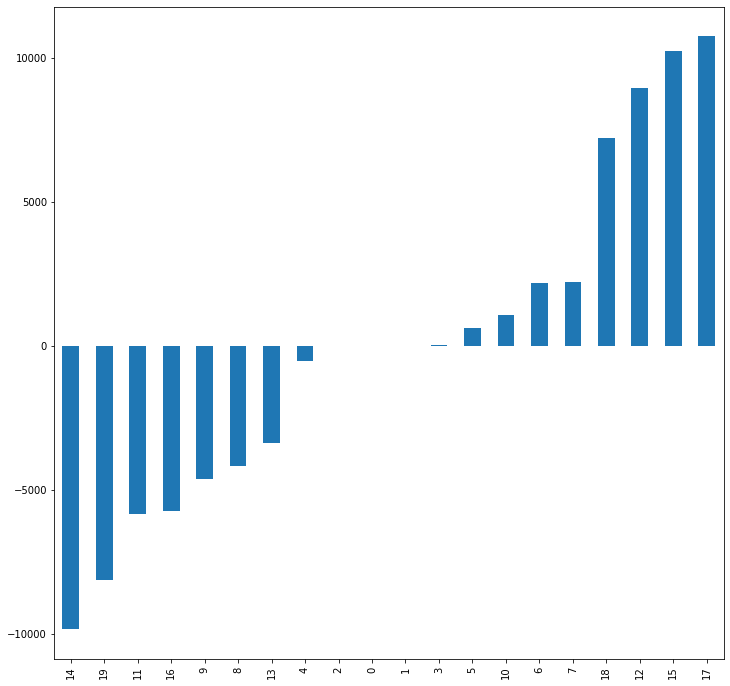

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
model.fit(x_train,y_train)
series = pd.Series(model.coef_,x_train.columns).sort_values(ascending = True)
plt.figure(figsize = (12,12))
series.plot(kind = 'bar')

In [69]:
predict = model.predict(x_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [67]:
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
#parameters = {'max_depth':[2,3,4],'n_estimators':[200,300,400]}
#model1 = GridSearchCV(model,parameters)
#model.fit(x_train,y_train)
#model1.best_params_


In [70]:
import pickle
pickle.dump(model,open('pickle.sav','wb'))


In [71]:
model1 = pickle.load(open('pickle.sav','rb'))

In [74]:
model1.predict([[0.1563,-0.1545,-0.3456,0.4597,0.7634,0.2134,0.8765,0.2346,-0.5342,-0.5237,0.9876,0.5367,0.8756,-0.6234,-0.6635,0.9453,0.9345,-0.8345,0.3564,0.9876]])

array([32561.68365029])